<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center>**Project 1. Job Analysis**
   

**Description**  
You will have at your disposal a resume database downloaded from the job search site hh.ru.  
Issue: Some job seekers do not indicate their desired salary when compiling their resume.  
This interferes with the HeadHunter recommendation system, which selects a list of the most suitable vacancies for job seekers and a list of the most suitable specialists for employers.  
HeadHunter wants to build a model that automatically determines the approximate salary level that is suitable for the user, based on the information that he indicated about himself. But, as you know, before a model can be built, the data must be transformed, explored, and cleaned. This is our task with you!

**Tasks**  
- Structure analysis
- Data transformation
- Search for dependencies in data
- Data cleaning

**About data**  
1. Пол, возраст - gender, age
2. ЗП - salary
1. Ищет работу на должность - career objective
1. Город, переезд, командировки - City, moving, business trips
1. Занятость - employment type
1. График - schedule
1. Опыт работы - work experience
1. Последнее/нынешнее место работы - current place of work
1. Последняя/нынешняя должность - current position
1. Образование и ВУЗ - Education and university
1. Обновление резюме - Resume update
1. Авто - having a car

In [297]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## <center> **Basic data structure analysis**

In [298]:
# load and check dimension
data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
data.shape

(44744, 12)

In [299]:
# explore our data
data.head(5)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [300]:
# continue exploring
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [301]:
# descriptive statistics
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


## <center> **Primary data transformation**

### **Task 1**  
Using the transformation function, create a new attribute **"Education"**, which should have 4 categories: "higher", "incomplete higher", "secondary special" and "secondary".

Perform the transformation, answer the security questions and remove the "Education and university" feature.


In [302]:
def get_education_type(education):
    """Func for getting education type

    Args:
        education (str): string from the Education column

    Returns:
        str: one of education type
    """
    
    # we only need the first few words
    education_list = education.split(' ', 2)
    
    if 'Неоконченное' in education_list[0]:
        return 'incomplete higher'
    
    if 'Высшее' in education_list[0]:
        return 'higher'
    
    if 'специальное' in education_list:
        return 'secondary special'
    
    else:
        return 'secondary'

# create new feature  
data['Education'] = data['Образование и ВУЗ'].apply(get_education_type)

# check the number of categories
display(data['Education'].unique())

# delete the feature "Образование и ВУЗ"
data = data.drop('Образование и ВУЗ', axis=1)

array(['incomplete higher', 'higher', 'secondary special', 'secondary'],
      dtype=object)

### **Task 2**  
Now we are interested in the "Gender, Age" column. Its current format is <gender, age, date of birth>.
Create two new features "Gender" and "Age".

In [303]:
def get_sex(sex):
    """func to get a gender

    Args:
        sex (str): string from the column with gender

    Returns:
        str: one of two categories - Male or Female
    """
    
    # splitting for searching a key word
    sex_list = sex.split(' ')
    
    if 'Мужчина' in sex_list[0]:
        return 'Male' 
    
    else:
        return 'Female'


def get_age(age):
    """func to get an years old

    Args:
        age (str): string from the column with age

    Returns:
        _int: age
    """
    
    # spliting for searching
    age_list = age.split(' ')
    
    # remove gaps
    del age_list[0:3]
    
    return int(age_list[0])


# create new features for gender and age
data['Gender'] = data['Пол, возраст'].apply(get_sex)
data['Age'] = data['Пол, возраст'].apply(get_age)

# get rid of that feature
data.drop(labels='Пол, возраст', axis=1, inplace=True)

### **Task 3**  
From the column, we need to highlight the total work experience of the applicant in months, we will call the new attribute "Work experience (month)".

In [304]:
def get_experience(exp):
    """func to get numbers of work experience in months

    Args:
        exp (str): string from the column

    Returns:
        int: number of months
    """
    
    # searching for gaps and return Nan
    if exp is np.nan:
        return np.nan
    
    if exp == 'Не указано':
        return np.nan
    
    # key words for months
    month_key_words = ['месяц', 'месяцев', 'месяца']
    
    # key words for years
    year_key_words = ['год', 'лет', 'года']
    
    # we need only several first words
    exp_list = exp.split(' ', 6)
    
    # create new values for future calculating
    month = 0
    year = 0
    
    # use a loop and find the number of years and months
    for index, values in enumerate (exp_list):
        
        if values in year_key_words:
            year = int(exp_list[index-1])
        
        if values in month_key_words:
            month = int(exp_list[index-1])
    
    return int(year*12 + month)
    

# create new feature
data['Work experience'] = data['Опыт работы'].apply(get_experience)

# get rig of that useless column
data.drop(labels='Опыт работы', axis=1, inplace=True)

### **Task 4**  
The next in line is the sign “City, moving, business trips”. The information in it is presented in the following form: >City, (metro), readiness to move (cities to move), readiness for business trips<>.  
Let's create separate signs "City", "Readiness to move", "Readiness for business trips".
- The feature "City" can contain only four categories: "Moscow", "St. Petersburg" and "million-plus city" (their list is below), designate the rest as "other".
- The features "Ready to travel" and "Ready to move" must have two possible options: True or False.

In [305]:
def get_city(arg):
    """func to get a city category 

    Args:
        arg (str): string from this column

    Returns:
        str: one of 4 categories
    """
    
    # spliting and finding a city name
    city_list = arg.split(' ')[0]
    
    # cities with a population of more than 1 million people 
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону','Уфа',
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    
    if 'Москва' in city_list:
        return 'Moscow'
    
    if 'Санкт-Петербург' in city_list:
        return 'St. Petersburg'
    
    if city_list in million_cities:
        return 'million-plus city'
    
    else:
        return 'other'


def ready_to_move(arg):
    """function to get readiness to move

    Args:
        arg (str): string from this column

    Returns:
        bool: caterory of readiness
    """
    
    # check key words
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    
    if 'хочу' in arg:
        return True
    
    else:
        return True
        

def ready_for_trips(arg):
    """function to get readiness to business trip

    Args:
        arg (str): string from this column

    Returns:
        bool: caterory of readiness
    """
    
    # check keay word
    if 'командировка' in arg:
        if ("не готов к командировкам" in arg) or ("не готова к командировкам" in arg):
            return False
        
        else:
            return True
    
    # if not specified - we consider that it is not ready    
    else:
        return False
    

# create a feature for city
data['City'] = data['Город, переезд, командировки'].apply(get_city)

# create a feature for moving
data['Ready to move'] = data['Город, переезд, командировки'].apply(ready_to_move)

# create a feature for bysiness trip
data['Ready to trip'] = data['Город, переезд, командировки'].apply(ready_for_trips)

# get rid of that useless feature
data.drop(labels='Город, переезд, командировки', axis=1, inplace=True)

### **Task 5**  
Now the attributes are a set of categories of desired employment (full-time, part-time, project work, volunteering, internship) and desired work schedule (full-time, shift schedule, flexible schedule, remote work, rotational work). On the site hh.ru, the applicant can indicate various combinations of these categories. This feature variant has many different combinations, and therefore many unique values, which hinders analysis.  
Let's create flashing signs for each category: if the category is on the applicant's wish list, then True is set in the column in place of the applicant's row, otherwise it is False.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

In [306]:
# employment type - all variants
employment = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']

# schedule type - all variants
schedule = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']

# looking for matches for employment type
for i in employment:
    data[i] = data['Занятость'].apply(lambda x: True if i in x else False)

# looking for matches for schedule type   
for i in schedule:
    data[i] = data['График'].apply(lambda x: True if i in x else False)


# get rid of these features
data.drop(labels='График', axis=1, inplace=True)
data.drop(labels='Занятость', axis=1, inplace=True)

### **Task 6**  
In addition to the desired salary, the applicant indicates the currency in which he would like to receive it.
It is necessary to make wages in a single currency (in rubles).
To do this, we load data with the exchange rate at the time of updating the cv.

* "currency" - currency name in ISO encoding,
* "date" - date, 
* "proportion" - this is a number that reflects how many units of the currency the rate corresponds to in the table with rates, 
* "close" - the last fixed exchange rate on the specified day.
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>

In [307]:
# transform date to datetime
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме']).dt.date

# load new dataset, transform date to datetime
exchange_df = pd.read_csv('ExchangeRates.csv', sep=',')
exchange_df['date'] = pd.to_datetime(exchange_df['date']).dt.date


def get_salary(arg):
    """func to get salary without symbols

    Args:
        arg (str): string from the salary column

    Returns:
        int: salary
    """
    
    # splitting, we need only first value
    salary = arg.split(' ')[0]
    
    return int(salary)


# create new feature without any symbols
data['Salary'] = data['ЗП'].apply(get_salary)


def get_iso(arg):
    """function to change the name of currencies according to iso

    Args:
        arg (str): string from the salary column

    Returns:
       str: Iso-currency
    """
    
    # splitting, we nedd one 2nd value
    iso = arg.split(' ')[1].replace('.', '')
    
    # dict with iso-names
    dictionary_iso = {
        'грн' : 'UAH', 'USD' : 'USD', 'EUR' : 'EUR', 'белруб' : 'BYN', 'KGS' : 'KGS', 'сум' : 'UZS', 'AZN' : 'AZN', 'KZT' : 'KZT'
    }
    
    # get iso-name
    if iso == 'руб':
        return 'RUB'
    
    else:
        return dictionary_iso[iso]


# create new feature for iso-currency   
data['Валюта'] = data['ЗП'].apply(get_iso)

# contain two tables
merged_data = data.merge(
    exchange_df,
    how='left',
    left_on=['Валюта', 'Обновление резюме'],
    right_on=['currency', 'date']
)

# fill in the gaps for "close" and "proportion"
merged_data['close'] = merged_data['close'].fillna(1)
merged_data['proportion'] = merged_data['proportion'].fillna(1)

# create new feature - salary in rubles
data['Salary RUB'] = merged_data['Salary'] * merged_data['close'] / merged_data['proportion']

# get rid of useless features
data.drop(labels=['ЗП', 'Salary', 'Валюта'], axis=1, inplace=True)

## <center> **Primary search for dependencies in data**

### **Task 1.**  
Plot the distribution of the feature "Age".

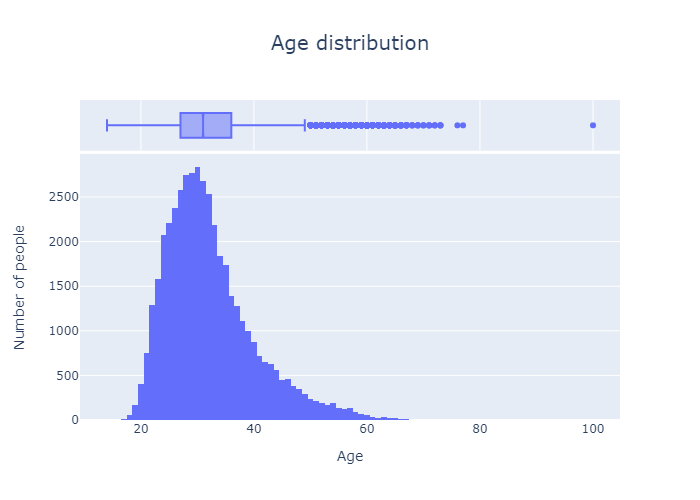

In [308]:
# build a graph
age_distribution = px.histogram(
    data_frame=data,
    x='Age',
    title='Age distribution',
    marginal='box'
)

# add labels
age_distribution.update_layout(
    xaxis_title='Age',
    yaxis_title='Number of people',
    title_font_size=20,
    title=dict(x=.5, xanchor='center')
)

age_distribution.show('png')

**Conclusion**  
The distribution is close to normal.  
The modal value is 30 years, which almost coincides with the median age (31 years). In fact, half of all candidates are between the ages of 27 and 36, and the bulk of applicants are between the ages of 20 and 60. In general, values outside these limits can be considered as anomalous.

### **Task 2**  
Plot the distribution of the feature "Work expirience".

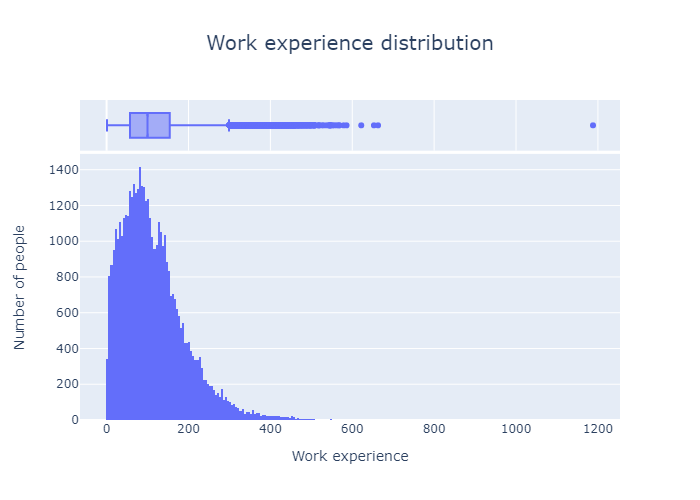

In [309]:
# build a graph
work_exp_plot = px.histogram(
    data_frame=data,
    x='Work experience',
    title='Work experience distribution',
    marginal='box'
)

# add labels
work_exp_plot.update_layout(
    yaxis_title='Number of people',
    title_font_size=20,
    title=dict(x=.5, xanchor='center')
)

# display
work_exp_plot.show('png')

**Conclusion**  
The distribution is close to normal with a clear roll to the left.  
The modal value of work experience is 80-84 months. Almost all values are distributed within 300 months, in applicants with experience of more than 400 months the minimum number. Such values should be checked for anomalies. The unequivocal anomalous value is about 1200 months, which "squeezed" the chart to the left quite a lot.  
In addition, it is worth evaluating the relationship between age and work experience, which will reveal additional abnormal values.

### **Task 3**  
Plot the distribution of the feature "Salary".

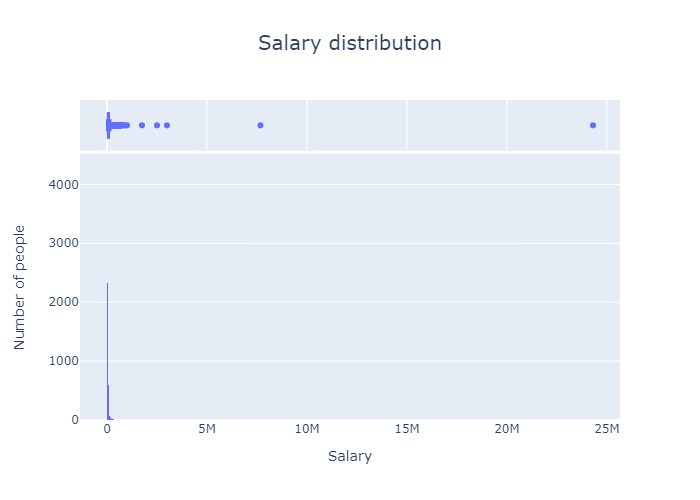

In [310]:
# build a graph
salary_distribution = px.histogram(
    data_frame=data,
    x='Salary RUB',
    title='Salary distribution',
    marginal='box'
)

# add labels
salary_distribution.update_layout(
    xaxis_title='Salary',
    yaxis_title='Number of people',
    title=dict(x=.5, xanchor='center'),
    title_font_size=20
)

# display
salary_distribution.show('png')

**Conclusion**  
The information content of the graph is minimal due to the obviously anomalous (or someone was very lucky with a salary) values of about 7.6 and 24.3 million rubles. A salary of more than 1 million rubles can be safely considered abnormal.
It is impossible to draw conclusions from the graph, it is necessary to clean the data.

### **Task 4**  
Construct a chart that shows the dependence of the median salary on the level of education.  
Use resume data for the diagram, where the desired salary is less than 1 million rubles.

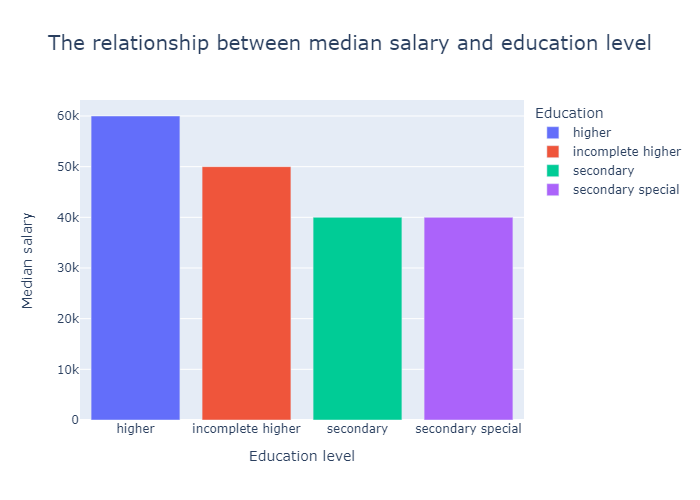

In [311]:
# create a mask according to the given conditions
salary_less_mln = data[data['Salary RUB'] < 1000000].groupby('Education', as_index=False).median()

# build a graph
salary_education_plot = px.bar(
    data_frame=salary_less_mln,
    x='Education',
    y='Salary RUB',
    color='Education',
    title='The relationship between median salary and education level'
)

# add labels
salary_education_plot.update_layout(
    xaxis_title='Education level',
    yaxis_title='Median salary',
    title=dict(x=.5, xanchor='center'),
    title_font_size=20
)

# display
salary_education_plot.show('png')

**Conclusion**  
The salary of a specialist obviously correlates with his level of education. Candidates with a higher education have the highest median salary, specialists who have not graduated from a higher education institution have a smaller one, and holders of secondary and specialized secondary have an equally equal lower salary.
The education level factor is important in predicting salary.

### **Task 5**  
Build a chart that shows the distribution of the desired salary depending on the city.  
Use resume data for the diagram, where the desired salary is less than 1 million rubles.

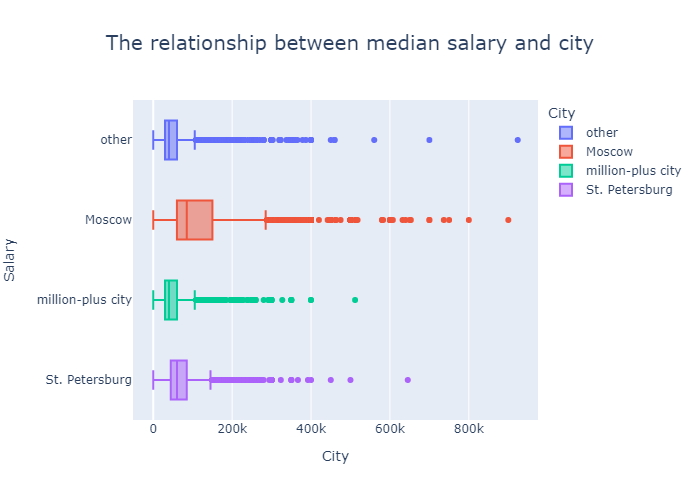

In [312]:
# create a mask according to the given conditions
salary_mask = data[data['Salary RUB'] < 1000000]

# build a graph
salary_city_plot = px.box(
    data_frame=salary_mask,
    x='Salary RUB',
    y='City',
    color='City',
    title='The relationship between median salary and city'
)

# add labels
salary_city_plot.update_layout(
    xaxis_title='City',
    yaxis_title='Salary',
    title=dict(x=.5, xanchor='center'),
    title_font_size=20
)

# display
salary_city_plot.show('png')

**Conclusion**  
The distribution of the median salary is quite expected - it is noticeably higher for candidates from Moscow (85 thousand), then from St. Petersburg (60 thousand), and at the end of the list are applicants from million-plus cities and other cities of the Russian Federation (40 thousand each).  
The situation is similar with the scope of the schedule - the largest for representatives of Moscow, almost half as much for Petersburgers, and for applicants from the category of million-plus cities and smaller cities it is the same and inferior to those previously described. It should be noted that the number of potential anomalous values in all categories is approximately the same.  
The influence of the city factor is absolutely obvious and directly correlates with the standard of living, which is quite important for our work.

### **Task 6**  
Build a multi-level bar chart that shows the dependence of the median salary on signs of readiness to move and travel.

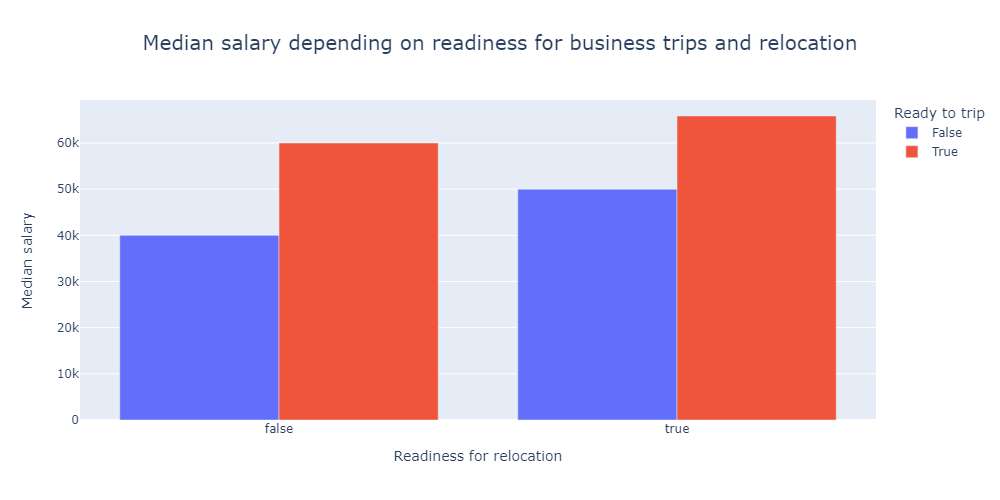

In [313]:
# create a mask according to the given conditions
move_trip_ready = data.groupby(['Ready to move', 'Ready to trip'], as_index=False)['Salary RUB'].median()

# build a graph
move_trip_plot = px.bar(
    data_frame=move_trip_ready,
    x='Ready to move',
    y='Salary RUB',
    color='Ready to trip',
    title='Median salary depending on readiness for business trips and relocation',
    barmode='group',
    width=1000
)

# add labels
move_trip_plot.update_layout(
    xaxis_title='Readiness for relocation',
    yaxis_title='Median salary',
    title=dict(x=.5, xanchor='center'),
    title_font_size=20
)

# display
move_trip_plot.show('png')

**Conclusion**  
It is expected that candidates ready for relocation and business trips have the highest median salary value (66 thousand), and those who are not ready for either - the lowest (40 thousand).  
An interesting point is that readiness only for business trips is estimated higher than for moving - 60 vs 50, respectively.

### **Task 7**  
Construct a pivot table illustrating the dependence of the median desired wage on age and education.  
Based on the resulting pivot table, build a heat map.

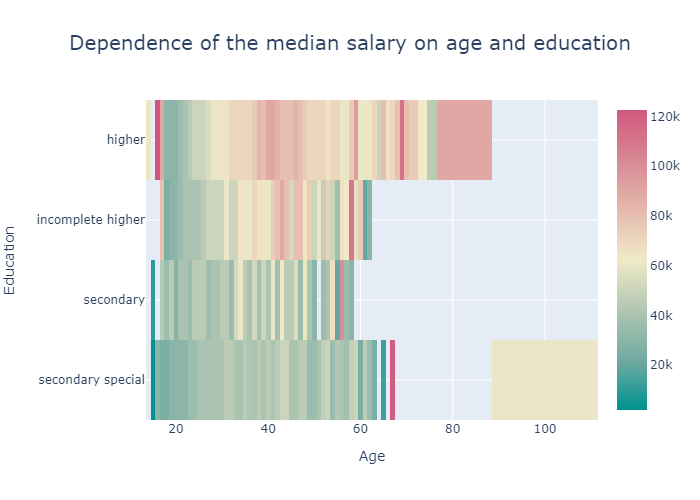

In [314]:
# build a pivot table
age_education = data.pivot_table(
    values='Salary RUB',
    index='Education',
    columns='Age',
    aggfunc='median'
)

# build a heatmap
age_education_plot = px.imshow(
    age_education,
    title='Dependence of the median salary on age and education',
    color_continuous_scale='tealrose'
)

# add labels
age_education_plot.update_layout(
    title=dict(x=.5, xanchor='center'),
    title_font_size=20
)

# disaply
age_education_plot.show('png')

**Conclusion**  
The obvious conclusion we made earlier about the dependence of education and the median salary is supplemented by the age factor.  
Applicants in all categories of education in middle age (from 30 to 50 years old) have higher values of the median salary, which is more noticeable for higher and incomplete higher education. In addition, the highest values in all categories are in fairly old candidates aged 55-70 years, which in general can be perceived as an anomaly. Obvious anomalous value in specialists with secondary specialized education aged ~90 years and candidates with higher education up to 18 years.  
The fastest growth rate of salaries is among specialists with complete higher education.

### **Task 8**  
Plot a scatterplot showing the relationship between work experience and age. 
Transform work experience from months to years so that the signs are on the same scale.

In [315]:
data['Work experience']

0        202.0
1        233.0
2        123.0
3        225.0
4         67.0
         ...  
44739     91.0
44740     84.0
44741    257.0
44742     46.0
44743    190.0
Name: Work experience, Length: 44744, dtype: float64

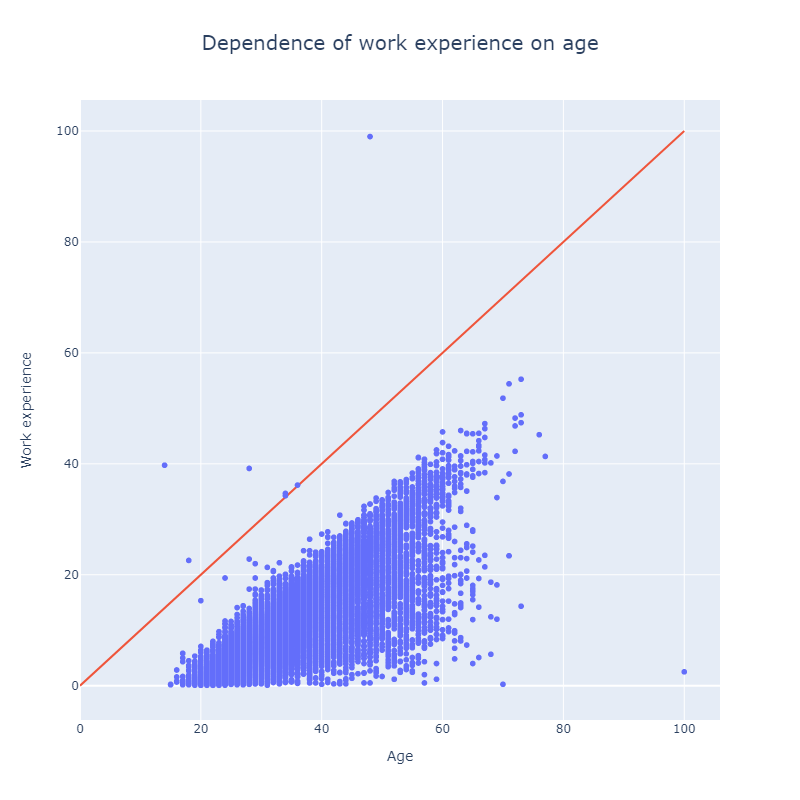

In [316]:
# create new feature
data['Experience years'] = data['Work experience'] / 12

# build a graph
experience_salary = px.scatter(
    data_frame=data,
    x='Age',
    y='Experience years',
    title='Dependence of work experience on age',
    width=800,
    height=800
)

# add simple plot for better visualization
experience_salary.add_scatter(
    x=[0,100],
    y=[0,100],
    mode='lines',
    showlegend=False
)

# add labels
experience_salary.update_layout(
    title=dict(x=.5, xanchor='center'),
    title_font_size=20,
    yaxis_title='Work experience'
)

# display
experience_salary.show('png')

**Conclusion**  
It is logical that work experience should be proportionally correlated with a person's age.  
Therefore, the results obtained are quite expected. There are obviously anomalous values in which the candidate has more experience than his age (above the red line), as well as many questionable data in which the person started working before the age of 10-14 years.  
In addition, there are observations in which people over 30 have close to zero work experience, but such results are especially suspicious in older candidates.

In [317]:
# don't forget to discard this feature
data = data.drop('Experience years', axis=1)

### **Task 9**  
Build a graph to assess the relationship of wages depending on gender and age.
For clarity, we exclude salary above 1 million rubles.

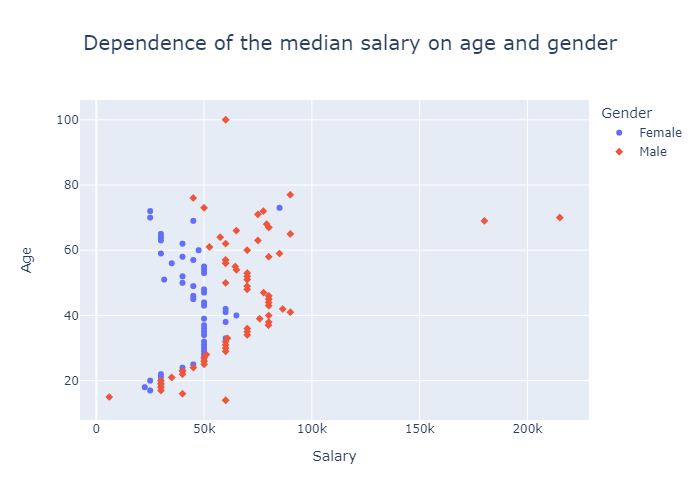

In [318]:
# group data
gender_age_df = data.groupby(['Gender', 'Age'], as_index=False)['Salary RUB'].median()

# build a graph
gender_age_plot = px.scatter(
    data_frame=gender_age_df,
    x='Salary RUB',
    y='Age',
    color='Gender',
    symbol='Gender',
    title='Dependence of the median salary on age and gender'
)

# add labels
gender_age_plot.update_layout(
    xaxis_title='Salary',
    title=dict(x=.5, xanchor='center'),
    title_font_size=20,
)

# display
gender_age_plot.show('png')

**Conclusion**  
Obviously, men are claiming a higher salary, which is especially noticeable for those over 30.

### **Task 10**  
Plot the median salary depending on the full time schedule and full time employment.


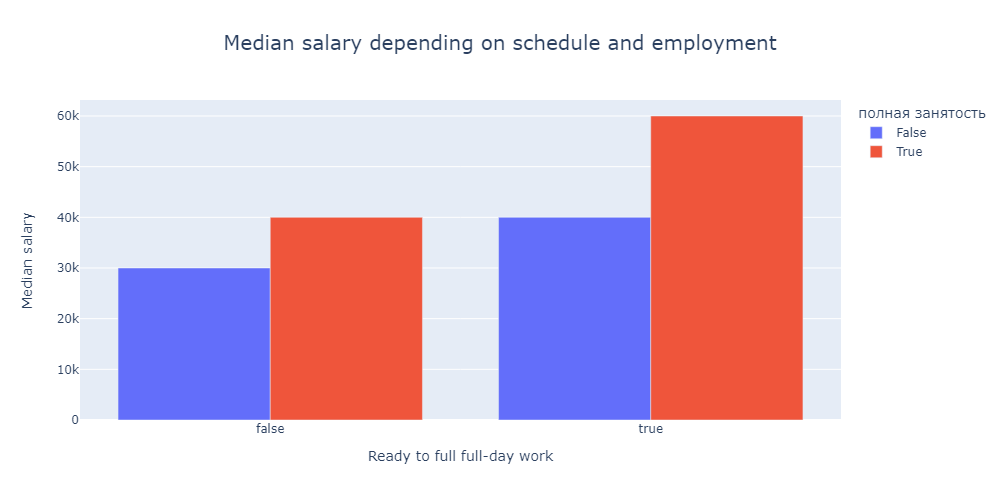

In [319]:
# group data
full_schedule_employ_df = data.groupby(['полный день', 'полная занятость'], as_index=False)['Salary RUB'].median()

# build a graph
full_schedule_employ = px.bar(
    data_frame=full_schedule_employ_df,
    x='полный день',
    y='Salary RUB',
    color='полная занятость',
    title='Median salary depending on schedule and employment',
    barmode='group',
    width=1000
)

# add labels
full_schedule_employ.update_layout(
    xaxis_title='Ready to full full-day work',
    yaxis_title='Median salary',
    title=dict(x=.5, xanchor='center'),
    title_font_size=20
)

# display
full_schedule_employ.show('png')

**Conclusion**  
It is expected that people who are ready to work full-time face to face claim a higher salary - a median salary of 60 thousand.  
Those who are not ready for both full-time work and full-time work (for example, remote work or project work) have a median salary of 30 thousand.

## <center> **Data cleaning**

### **Task 1**  
Find complete duplicates in the summary table and remove them.

In [320]:
# check dimensity, drop duplicates
print(data.shape)
data = data.drop_duplicates()

# and check dimensity again
print(data.shape)

(44744, 23)
(44583, 23)


### **Task 2**  
Get rid of gaps

In [321]:
# checking for gaps
data.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Education                            0
Gender                               0
Age                                  0
Work experience                    168
City                                 0
Ready to move                        0
Ready to trip                        0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удалённая работа                     0
вахтовый метод                       0
Salary RUB                           0
dtype: int64

### **Task 3**  
Delete the lines where there is a gap in the columns with place of work and position.  
Fill in the gaps in the work experience column with the median value.

In [322]:
# get rid of missing values - delete lines in place of work and position
data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# fill in missing values by mediam value for work experience
data = data.fillna(data['Work experience'].median())

# check for gaps again
data.isnull().sum()

Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Education                          0
Gender                             0
Age                                0
Work experience                    0
City                               0
Ready to move                      0
Ready to trip                      0
полная занятость                   0
частичная занятость                0
проектная работа                   0
волонтерство                       0
стажировка                         0
полный день                        0
сменный график                     0
гибкий график                      0
удалённая работа                   0
вахтовый метод                     0
Salary RUB                         0
dtype: int64

### **Task 4**  
Delete cvs that indicate wages either above 1 million rubles or below 1 thousand rubles.  
Let's do it manually.

In [323]:
# create a mask
salary_mask = data[(data['Salary RUB'] > 1000000) | (data['Salary RUB'] < 1000)]

# get rid of its
data = data.drop(salary_mask.index, axis=0)

# check dimensity again
data.shape

(44492, 23)

### **Task 5**  
In the process of reconnaissance analysis, we found resumes in which work experience in years exceeded the age of the applicant. Find such summaries and remove them from the data.

In [324]:
# create mask according to the task
age_experience_mask = data[(data['Age']) < (data['Work experience'] / 12)]

# get rid of its
data = data.drop(age_experience_mask.index, axis=0)

# check dimensity again
data.shape

(44485, 23)

### **Task 6**  
As a result of the analysis, we found potential outliers in the feature Age. These turned out to be resumes of people whose age is too advanced to find a job.  
Try plotting the feature distribution on a logarithmic scale. Add lines to the graph to show the mean and bounds of the Three Sigma interval. Let's do a 1 sigma "relaxation" (take 4 sigma) to the right side.

31137     15
32950     15
33654    100
Name: Age, dtype: int64


(44482, 23)

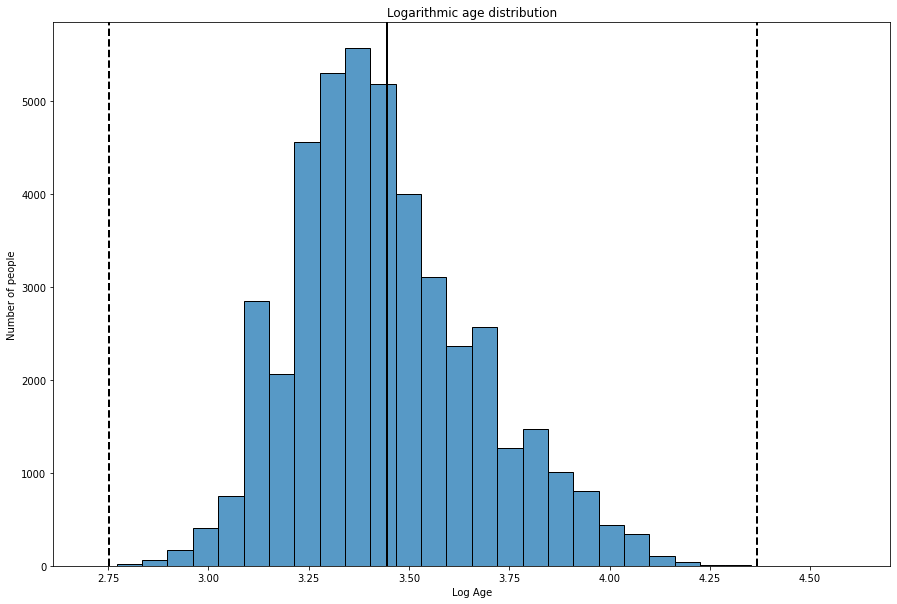

In [325]:
# build a graph
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
log_age = np.log(data['Age'])
histplot = sns.histplot(log_age, bins=30)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Logarithmic age distribution')
histplot.set_xlabel('Log Age')
histplot.set_ylabel('Number of people');

def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    """func to search for outliers

    Args:
        data ([pd.DataFrame]): dataset
        feature ([int, float]): feature from a dataset
        log_scale (bool, optional): sign of logarithmic scale. Defaults to False.
        left (int, optional): correction factor to the left. Defaults to 3.
        right (int, optional): correction factor to the right. Defaults to 3.

    Returns:
        pd.DataFrame: outliers and cleaned dataset
    """
    
    # check the log scale
    if log_scale:
        x = np.log(data[feature] + 1)
        
    else:
        x = data[feature]
    
    # calculating the lower and the upper bounds    
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    
    # calculate outliers and get cleaned dataset
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    
    return outliers, cleaned


# use the func for our dataset and get cleaned data
outliers, cleaned = outliers_z_score(data, 'Age', log_scale=True, right=4)

# display age for outliers
print(outliers['Age'])

# rename cleaned dataset and check dimensity
data = cleaned
data.shape

**Conclusion**  
The distribution is close to normal with left asymmetry. Outliers for age are 15 and 100 years.

## <center> **General conclusion**  
In the course of this work, the following was carried out:
- processing data from outliers, duplicates, omissions
- visualization and search for dependencies
- primary transformation of some features

The data is prepared for further use to build a model.